In [ ]:
import os


In [ ]:
os.environ['KAGGLE_USERNAME']="raninaattef"
os.environ['KAGGLE_KEY']="a269bf45e22b6bed87e181047763d366"
!kaggle datasets download -d datamunge/sign-language-mnist #copy api

sign-language-mnist.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

american_sign_language.PNG  sample_data		     sign_mnist_test.csv
amer_sign2.png		    sign-language-mnist.zip  sign_mnist_train
amer_sign3.png		    sign_mnist_test	     sign_mnist_train.csv


In [ ]:
!unzip sign-language-mnist

Archive:  sign-language-mnist.zip
replace amer_sign2.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: All
  inflating: amer_sign2.png          
  inflating: amer_sign3.png          
  inflating: american_sign_language.PNG  
  inflating: sign_mnist_test.csv     
  inflating: sign_mnist_test/sign_mnist_test.csv  
  inflating: sign_mnist_train.csv    
  inflating: sign_mnist_train/sign_mnist_train.csv  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression



In [ ]:
train=pd.read_csv('/content/sign_mnist_train.csv')
train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [ ]:
train.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [ ]:
train['label'].unique()

array([ 3,  6,  2, 13, 16,  8, 22, 18, 10, 20, 17, 19, 21, 23, 24,  1, 12,
       11, 15,  4,  0,  5,  7, 14])

In [ ]:
Features=train.iloc[:,1:].values
target=train.iloc[:,0].values
target

array([ 3,  6,  2, ..., 18, 17, 23])

In [ ]:
Features

array([[107, 118, 127, ..., 204, 203, 202],
       [155, 157, 156, ..., 103, 135, 149],
       [187, 188, 188, ..., 195, 194, 195],
       ...,
       [174, 174, 174, ..., 202, 200, 200],
       [177, 181, 184, ...,  64,  87,  93],
       [179, 180, 180, ..., 205, 209, 215]])

In [ ]:
#normalize the features
features_normm=(Features-Features.min())/(Features.max()-Features.min())


In [ ]:
features_normm


array([[0.41960784, 0.4627451 , 0.49803922, ..., 0.8       , 0.79607843,
        0.79215686],
       [0.60784314, 0.61568627, 0.61176471, ..., 0.40392157, 0.52941176,
        0.58431373],
       [0.73333333, 0.7372549 , 0.7372549 , ..., 0.76470588, 0.76078431,
        0.76470588],
       ...,
       [0.68235294, 0.68235294, 0.68235294, ..., 0.79215686, 0.78431373,
        0.78431373],
       [0.69411765, 0.70980392, 0.72156863, ..., 0.25098039, 0.34117647,
        0.36470588],
       [0.70196078, 0.70588235, 0.70588235, ..., 0.80392157, 0.81960784,
        0.84313725]])

In [ ]:
logisticRegr = LogisticRegression()

In [ ]:
logisticRegr.fit(features_normm,target)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
test=pd.read_csv('/content/sign_mnist_test.csv')

In [ ]:
test.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [ ]:
test_x=test.iloc[:,1:].values
test_y=test.iloc[:,0].values

In [ ]:
test_x_norm=(test_x-test_x.min())/(test_x.max()-test_x.min())

In [ ]:
test_x_norm

array([[0.58431373, 0.58431373, 0.58823529, ..., 0.43921569, 0.47058824,
        0.41960784],
       [0.49411765, 0.50196078, 0.51372549, ..., 0.72156863, 0.71372549,
        0.70588235],
       [0.33333333, 0.34509804, 0.36078431, ..., 0.88235294, 0.87843137,
        0.87058824],
       ...,
       [0.74509804, 0.74901961, 0.74509804, ..., 0.82745098, 0.81960784,
        0.81568627],
       [0.78823529, 0.80392157, 0.81568627, ..., 0.2627451 , 0.2745098 ,
        0.24705882],
       [0.67843137, 0.68235294, 0.67843137, ..., 0.76470588, 0.75686275,
        0.75294118]])

In [ ]:
predicted=logisticRegr.predict(test_x_norm)

In [ ]:
# Use score method to get accuracy of model
score = logisticRegr.score(test_x_norm, test_y)
print(score)

0.675404350250976


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [ ]:
cm = metrics.confusion_matrix(test_y, predicted)
print(cm)

[[305   0   0   0   0   0   0   0   0   0   0   0   0  26   0   0   0   0
    0   0   0   0   0   0]
 [  0 387   0  21   0   0   0   0   0  10   0   0   0   0   0   0   3   0
    0  11   0   0   0   0]
 [  0   0 283   0   0  21   0   0   0   0   2   0   0   0   0   0   0   0
    0   0   4   0   0   0]
 [  0   0   0 208   3   0   0   5   0   0   0   0   0   0   0   0   9   0
    0   0   0   0  20   0]
 [  0   0   0   0 414   0   0   0   0   0   0   2  18   1   0   0   0  63
    0   0   0   0   0   0]
 [  0   0  21   0   0 223   3   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0  16   0   0 234  18   3   0   0  12   0   0   0  38   0   0
   27   0   0   0   0   0]
 [  0   0   2   0   0   0  46 307   0   0   0  21   0   0   0   0   0   0
   40  17   0   0   3   0]
 [  0   0   0   0  14   0   0  21 184   0  21   0   0   0   0   0  21   0
    0   0   0   0   0  27]
 [  0   0   0   5   0  14   0   0   0 126   0  20   0   0  22   0  97  21
    0  18   0   7

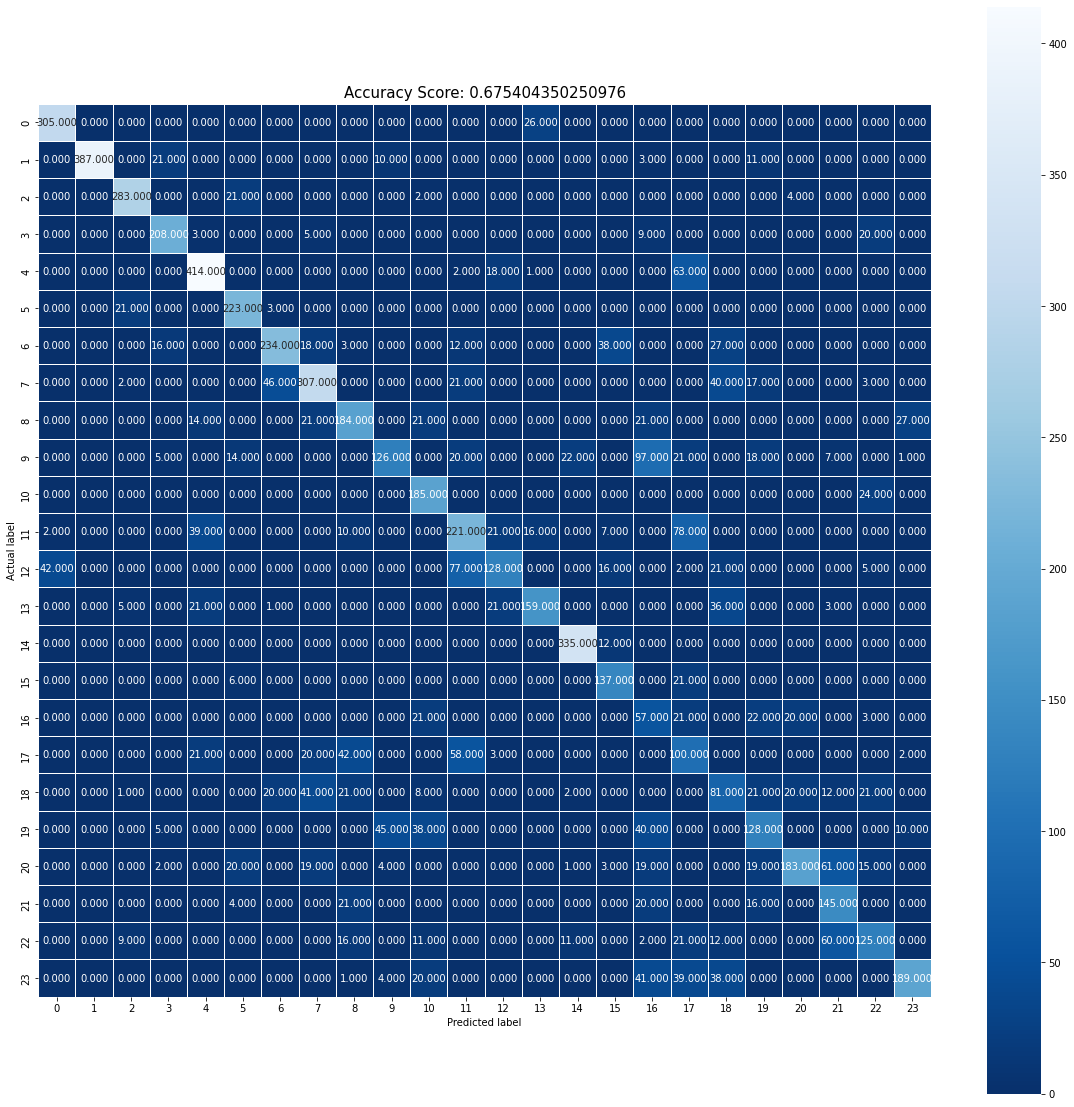

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);